In [2]:
import pandas as pd

file_path = 'Superstore.csv'
df = pd.read_csv(file_path)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

(None,
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
 0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
 3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City  ...  \
 0      Claire Gute   Consumer  United States        Henderson  ...   
 1      Claire Gute   Consumer  United States        Henderson  ...   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 
   Postal Code  Region       Product ID         Category Sub-Category  

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function 1: Summary Statistics
def summary_statistics(df):
    print("Summary Statistics for Numeric Columns:\n")
    display(df.describe())

summary_statistics(df)

Summary Statistics for Numeric Columns:



,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
# Function 2: Missing Data Summary
def missing_data_summary(df):
    print("\nMissing Data Summary:\n")
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    if not missing_data.empty:
        print(missing_data)
    else:
        print("No missing values found.")
missing_data_summary(df)


Missing Data Summary:

No missing values found.



Distribution of Numeric Columns:



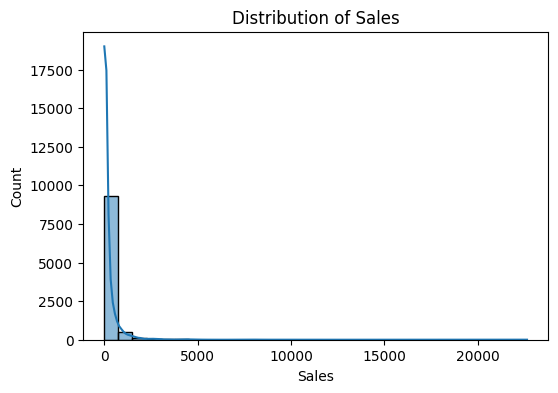

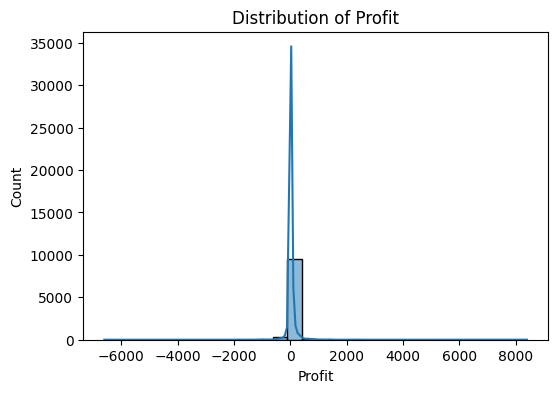

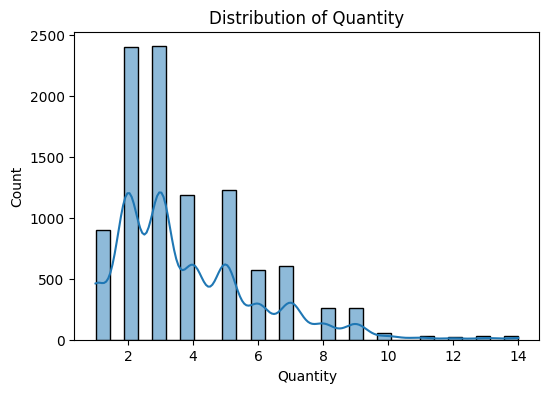

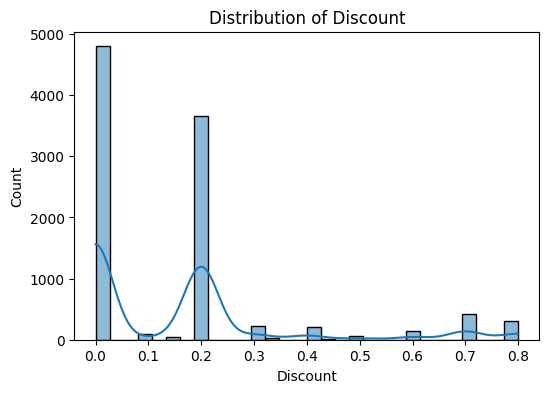

In [13]:
# Function 3: Distribution Plots for Numeric Columns
def distribution_plots(df, columns):
    print("\nDistribution of Numeric Columns:\n")
    for col in columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()

distribution_plots(df, ['Sales', 'Profit', 'Quantity', 'Discount'])


Correlation Matrix:



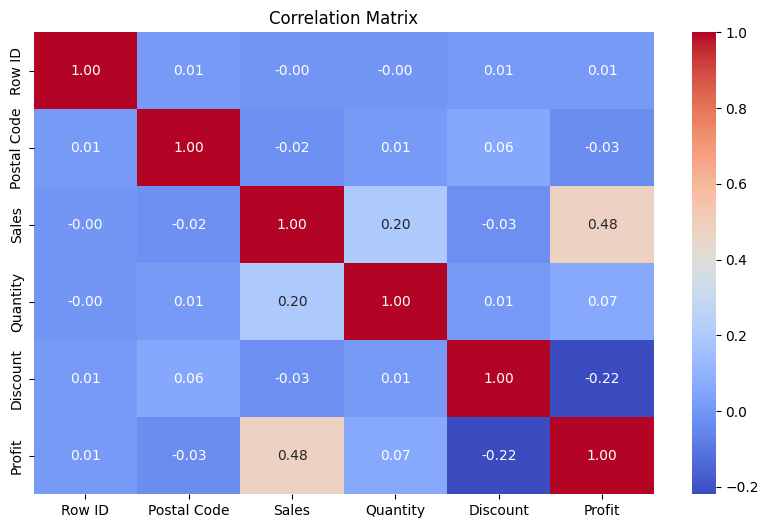

In [22]:
# Function 4: Correlation Matrix
def correlation_matrix(df):
    print("\nCorrelation Matrix:\n")
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Calculate correlation
    corr = numeric_df.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

correlation_matrix(df)


Categorical Data Analysis:



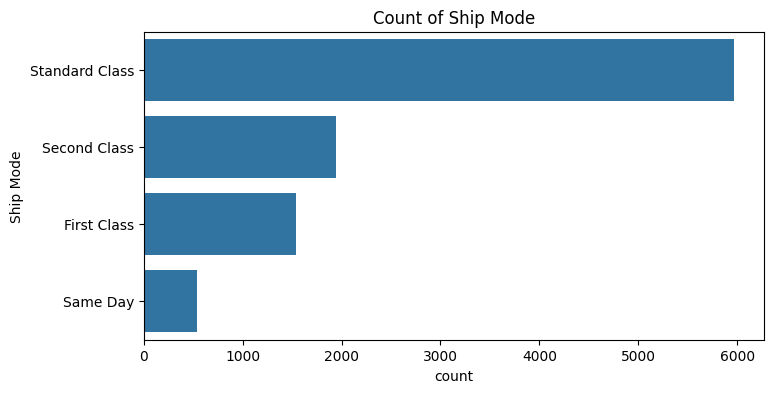

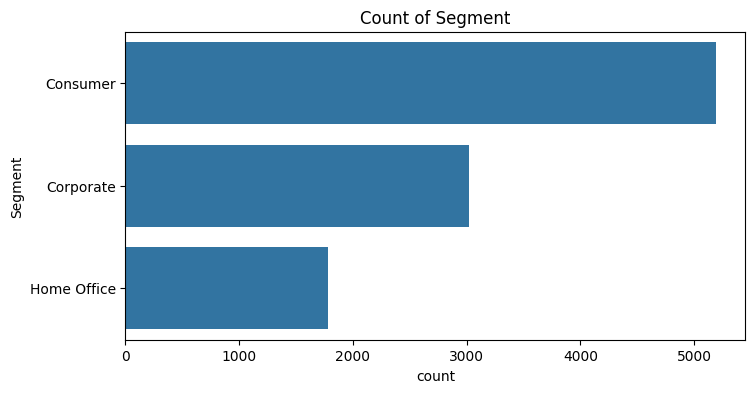

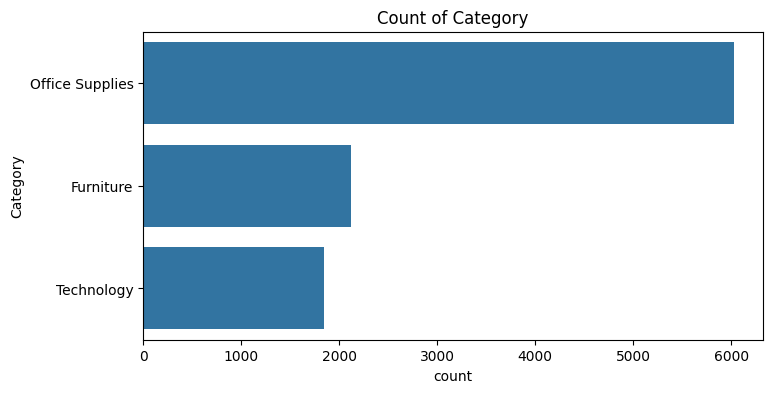

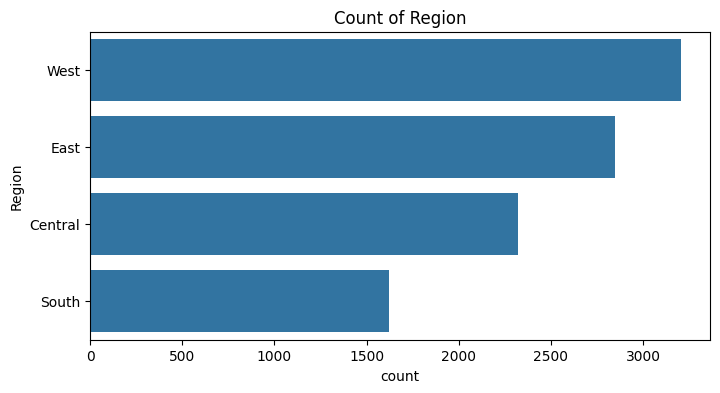

In [15]:

# Function 5: Categorical Data Analysis (Counts of each category)
def categorical_data_analysis(df, categorical_columns):
    print("\nCategorical Data Analysis:\n")
    for col in categorical_columns:
        plt.figure(figsize=(8,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Count of {col}")
        plt.show()

categorical_data_analysis(df, ['Ship Mode', 'Segment', 'Category', 'Region'])

In [16]:
# Function 6: Top-N Analysis (Top customers, products, states by sales)
def top_n_analysis(df, column, metric, n=10):
    print(f"\nTop {n} {column} by {metric}:\n")
    top_n = df.groupby(column)[metric].sum().sort_values(ascending=False).head(n)
    print(top_n)

top_n_analysis(df, 'Customer Name', 'Sales', n=5)


Top 5 Customer Name by Sales:

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64



Outlier Detection Using Boxplots:



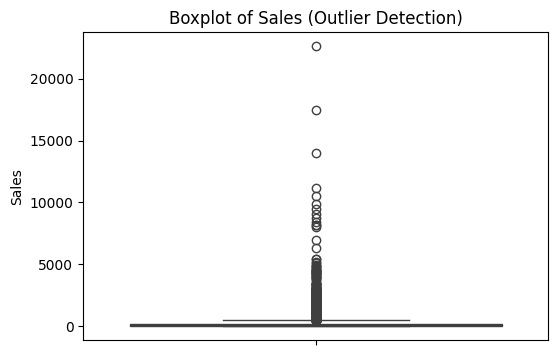

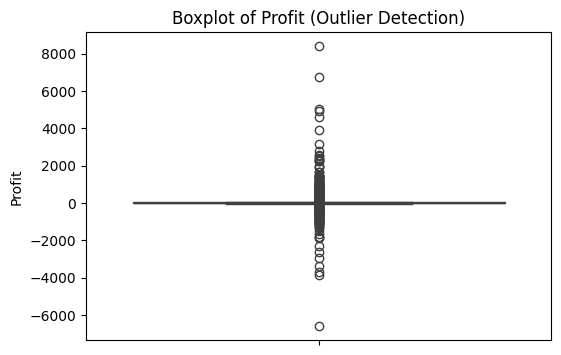

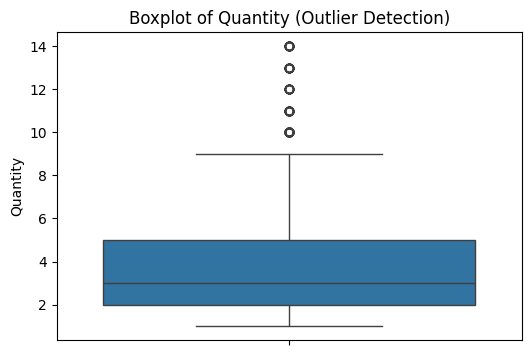

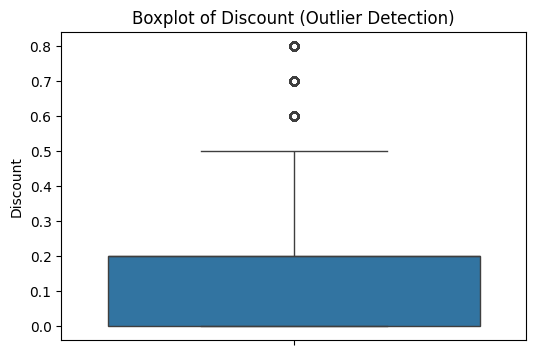

In [17]:
from scipy import stats

# Function 7: Outlier Detection with Boxplot
def outlier_boxplot(df, numeric_columns):
    print("\nOutlier Detection Using Boxplots:\n")
    for col in numeric_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(df[col])
        plt.title(f"Boxplot of {col} (Outlier Detection)")
        plt.show()
outlier_boxplot(df, ['Sales', 'Profit', 'Quantity', 'Discount'])

In [18]:
# Function 8: Z-Score Outlier Removal
def remove_outliers_zscore(df, threshold=3):
    print("\nRemoving Outliers Based on Z-Score:\n")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    z_scores = stats.zscore(df[numeric_cols])
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    cleaned_df = df[filtered_entries]
    print(f"Original Dataset Shape: {df.shape}")
    print(f"Dataset Shape After Removing Outliers: {cleaned_df.shape}")
    return cleaned_df
df_cleaned = remove_outliers_zscore(df)


Removing Outliers Based on Z-Score:

Original Dataset Shape: (9994, 21)
Dataset Shape After Removing Outliers: (9436, 21)



Feature Pairplot of Numeric Columns:



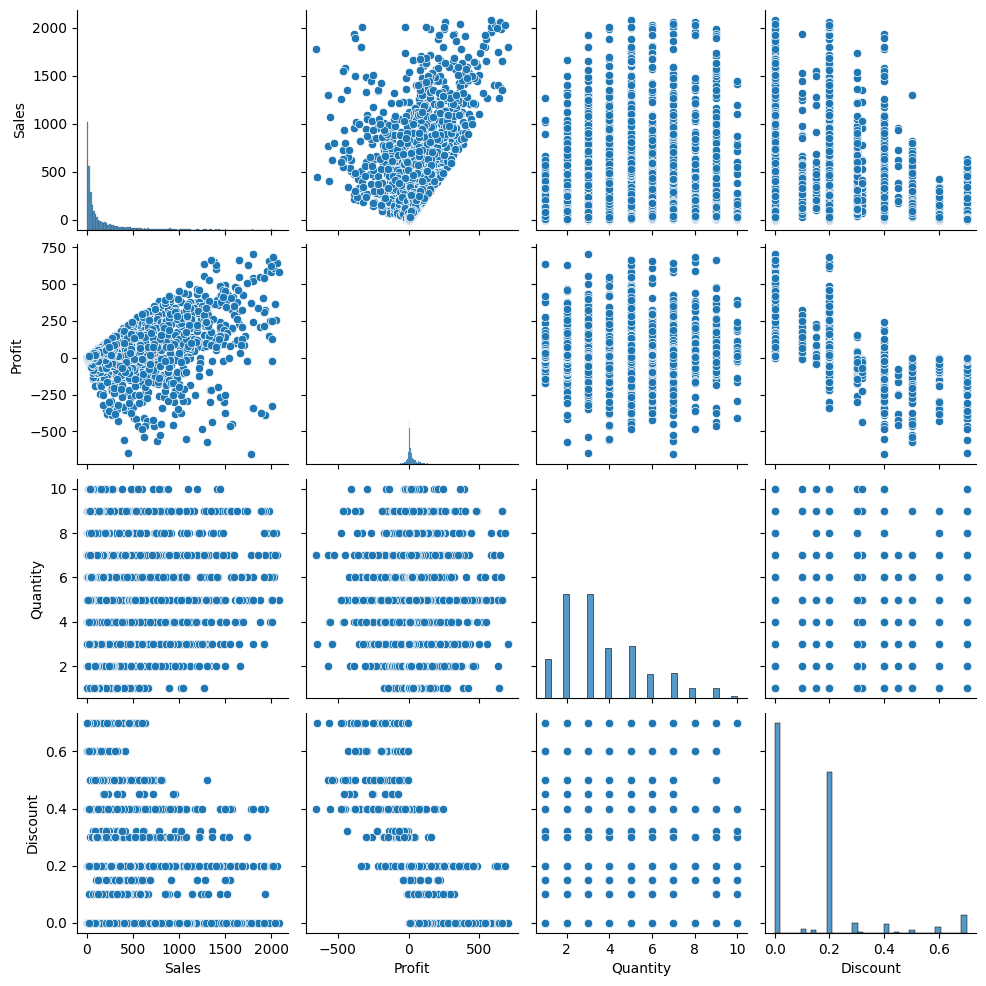

In [19]:
# Function 9: Pairplot of Numeric Columns
def feature_pairplot(df, columns):
    print("\nFeature Pairplot of Numeric Columns:\n")
    sns.pairplot(df[columns])
    plt.show()
feature_pairplot(df_cleaned, ['Sales', 'Profit', 'Quantity', 'Discount'])

In [20]:
# Function 10: Sales and Profit per Category/Sub-Category
def sales_profit_per_category(df):
    print("\nSales and Profit by Category and Sub-Category:\n")
    category_group = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
    display(category_group)
sales_profit_per_category(df_cleaned)


Sales and Profit by Category and Sub-Category:



Sales      Profit
Category        Sub-Category                         
Technology      Phones        285278.4300  36291.4545
Furniture       Chairs        280872.7060  21413.2608
Office Supplies Storage       212902.4440  18899.0679
Furniture       Tables        165892.3220 -15176.3058
Technology      Accessories   148733.2960  36421.8573
Office Supplies Binders        90211.3750  22178.2053
Furniture       Bookcases      88588.9977  -2188.8628
                Furnishings    87934.5800  11854.8164
Office Supplies Appliances     85565.4890  21335.7810
                Paper          76043.4340  33046.6132
Technology      Copiers        42639.0080  12322.7236
                Machines       40526.9090    261.4003
Office Supplies Art            26957.1920   6491.0574
                Supplies       16651.3900    -44.3161
                Envelopes      16476.4020   6964.1767
                Labels         11792.7540   5239.5269
                Fasteners       2730.6480    877.4990


Time Series Analysis of Sales Over Time:



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16924\1242015015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert 'Order Date' to datetime format


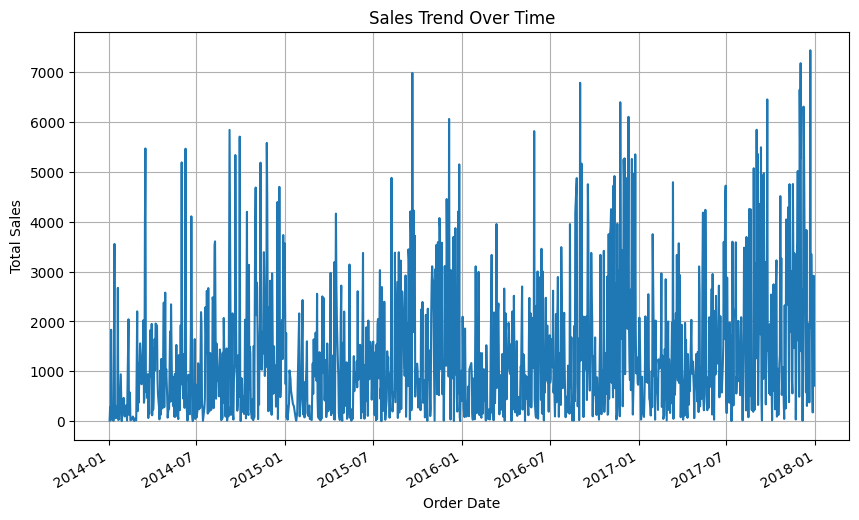

In [21]:
# Function 11: Time Series Analysis (Trend of Sales over Time)
def time_series_analysis(df):
    print("\nTime Series Analysis of Sales Over Time:\n")
    df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert 'Order Date' to datetime format
    sales_trend = df.groupby('Order Date')['Sales'].sum()
    plt.figure(figsize=(10, 6))
    sales_trend.plot()
    plt.title('Sales Trend Over Time')
    plt.xlabel('Order Date')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()
time_series_analysis(df_cleaned)